In [104]:
from textblob import TextBlob, Word
from collections import Counter
from nltk.corpus import stopwords
import re
from itertools import combinations
import collections
from matplotlib import pyplot as plt

plt.style.use('ggplot')


# Extract nouns from "Our New England Family Recipes"

... and analyse ingredients in recipes.

## Main text stats

In [139]:
f = open('our_new_england_family_recipes.txt')

In [140]:
#f.read()

In [141]:
blob = TextBlob(f.read())

In [142]:
# words and unique words via TextBlob
len(blob.words), len(set(blob.words))

(23230, 3508)

In [143]:
# "tokenising" manually instead - split by space and newline
f = open('our_new_england_family_recipes.txt')
len(re.split(' |\n ', f.read()))

23197

In [144]:
blob.words[:100]

WordList(['OUR', 'NEW', 'ENGLAND', 'FAMILY', 'Rlcipls', 'Compiled', 'by', 'MR5', 'FRANCI5', 'JARVI5', 'PATTEN', 'Copyright', '1910', 'by', 'National', 'Society', 'of', 'New', 'England', 'Women', 'TOBIAS', 'A', 'WRIGHT', 'ISO', 'Bt-EECKER', 'STREET', 'N', 'Y', '©Ci', 'A283687', 'Index', 'WHAT', 'DOL5', 'COOKERY', 'MEAN', '5', 'BREAD', '7', 'BREAKFAST', 'LUNCHEON', 'AND', 'TEA', '12', 'CAKE', '34', 'CANDY', '51', 'COOKIE5', 'GINGERBREAD', 'ETC', '54', 'GRANDMOTHER', '5', 'COOKING', 'Poem', '70', 'DE55ERT5', '71', 'FISH', '78', 'ICES', 'CREAM', 'PUNCHES', '84', 'PICKLES', '92', 'PIE', '97', 'PRESERVES', '103', 'PUDDINGS', '109', 'SALADS', '121', 'SOUPS', '127', 'LIST', 'OF', 'MEMBERS', '131', 'LDITION', 'LIMITLD', 'TO', '500', 'SIGNED', 'COPIES', 'It', 'means', 'the', 'knowledge', 'of', 'all', 'fruits', 'herbs', 'balms', 'and', 'spices', 'and', 'of', 'all'])

### Word frequencies

In [145]:
#blob.word_counts

In [146]:
#sorted(blob.word_counts.items(), key=lambda x:x[1], reverse=True)

In [147]:
#stopwords.words('english')

In [148]:
# remove NLTK stopwords, show most frequent words
tmp = {k:v for k,v in blob.word_counts.items() if k not in stopwords.words('english')}
tmp_sorted = sorted(tmp.items(), key=lambda x:x[1], reverse=True)

tmp_sorted

[('mrs', 608),
 ('cup', 458),
 ('one', 397),
 ('two', 380),
 ('sugar', 308),
 ('half', 283),
 ('add', 254),
 ('butter', 213),
 ('milk', 201),
 ('flour', 199),
 ('eggs', 191),
 ('water', 170),
 ('salt', 167),
 ('three', 154),
 ('teaspoon', 152),
 ('cream', 148),
 ('cups', 141),
 ('egg', 100),
 ('till', 100),
 ('four', 96),
 ('pour', 92),
 ('bake', 88),
 ('baking', 87),
 ('minutes', 87),
 ('boil', 85),
 ('pint', 83),
 ('beat', 82),
 ('cold', 81),
 ('beaten', 81),
 ('tablespoon', 80),
 ('tablespoons', 77),
 ('hot', 76),
 ('stir', 75),
 ('serve', 74),
 ('chopped', 71),
 ('cut', 71),
 ('place', 70),
 ('powder', 70),
 ('pound', 65),
 ('mix', 63),
 ('juice', 63),
 ('quart', 62),
 ('oven', 62),
 ('cook', 61),
 ('h', 60),
 ('white', 59),
 ('spoon', 58),
 ('teaspoons', 58),
 ('small', 58),
 ('j', 58),
 ('little', 57),
 ('lemon', 57),
 ('whites', 56),
 ('brown', 55),
 ('e', 55),
 ('pan', 54),
 ('pepper', 54),
 ('mixture', 53),
 ('well', 53),
 ('dish', 52),
 ('soda', 50),
 ('tea', 49),
 ('william'

In [149]:
#tmp

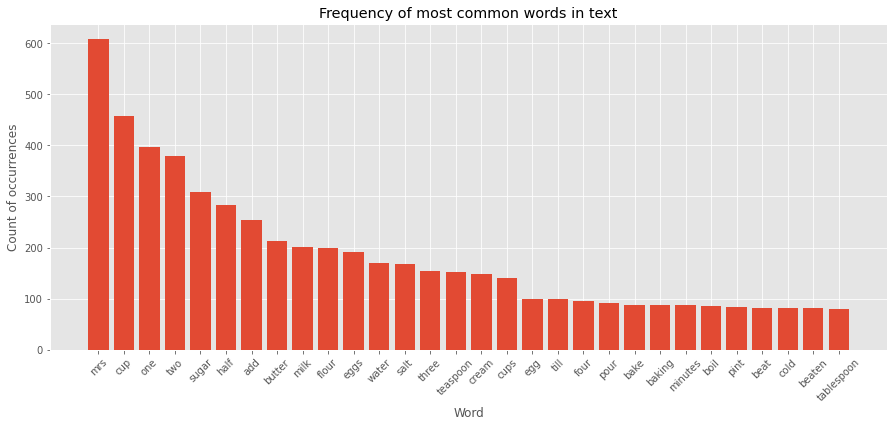

In [150]:
plt.figure(figsize=(15,6))

plt.xticks(rotation=45)

num = 30
plt.bar([item[0] for item in tmp_sorted[:num]], [item[1] for item in tmp_sorted[:num]])
plt.title('Frequency of most common words in text')
plt.xlabel('Word')
plt.ylabel('Count of occurrences')
plt.savefig('freq.jpeg')

In [151]:
#blob.tags

## Manual counts of recipes per category

These are counted manually from the book.

In [152]:
d_recipes = {
    'Bread': 12,
    'Breakfast, luncheon and tea': 67,
    'Cake': 47,
    'Candy': 8,
    'Cookies, gingerbread etc.': 52,
    'Desserts': 17,
    'Fish': 15,
    'Ices, cream and punches': 24,
    'Pickels': 13,
    'Pie': 14,
    'Preserves': 14,
    'Pudding': 33,
    'Salads': 16,
    'Soups': 7 
}

In [269]:
sum(d_recipes.values())

339

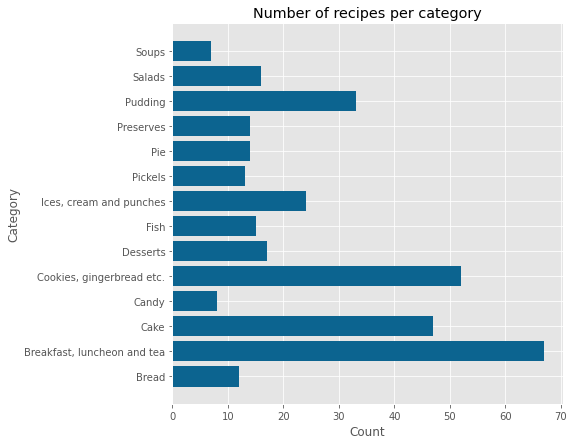

In [153]:
plt.figure(figsize=(7,7))
plt.barh(list(d_recipes.keys()), list(d_recipes.values()), color='#0C6490')
#plt.xticks(rotation=90);
plt.title('Number of recipes per category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.savefig('recipes.jpeg')

## Nouns - whole text

In [165]:
nouns = []
for item in blob.tags:
    if item[1] in ['NN', 'NNS', 'NNP', 'NNPS']:    # using proper nouns otherwise it misses many (non proper)
        nouns.append(item[0].lower())

In [166]:
len(set(nouns))


2318

In [167]:
nouns

['our',
 'new',
 'england',
 'family',
 'rlcipls',
 'compiled',
 'mr5',
 'franci5',
 'jarvi5',
 'patten',
 'copyright',
 'national',
 'society',
 'new',
 'england',
 'women',
 'tobias',
 'a.',
 'wright',
 'iso',
 'bt-eecker',
 'street',
 'n.',
 'y',
 '©ci',
 'a283687',
 'index',
 'what',
 'dol5',
 'cookery',
 'mean',
 'bread',
 'breakfast',
 'luncheon',
 'and',
 'tea',
 'cake',
 'candy',
 'cookie5',
 'gingerbread',
 'etc',
 'grandmother',
 'cooking',
 'poem',
 'de55ert5',
 'fish',
 'ices',
 'cream',
 'punches',
 'pickles',
 'pie',
 'preserves',
 'puddings',
 'salads',
 'soups',
 'list',
 'of',
 'members',
 'ldition',
 'limitld',
 'to',
 'signed',
 'copies',
 'knowledge',
 'fruits',
 'herbs',
 'balms',
 'spices',
 'fields',
 'groves',
 'savory',
 'meats',
 'carefulness',
 'inventiveness',
 'fulness',
 'willingness',
 'readiness',
 'appliance',
 'economy',
 'mothers',
 'science',
 'chemists',
 'tasting',
 'wasting',
 'thoroughness',
 'art',
 'hospitality',
 'ladies',
 'loaf-givers',
 'ev

In [ ]:
# to use TextBlob to lemmatise need to download omw-1.4 package from NLTK, see here on how to https://www.nltk.org/data.html

In [18]:
# lemmatise nouns - use is this way

w = Word('peppers')
w.lemma

'pepper'

In [168]:
nouns_lemmas = [Word(noun).lemma for noun in nouns]

In [214]:
len(set(nouns_lemmas))

2178

In [169]:
c = collections.Counter(nouns_lemmas)

In [171]:
len(c.most_common())
c.most_common()

[('mrs.', 597),
 ('cup', 535),
 ('sugar', 306),
 ('egg', 289),
 ('teaspoon', 203),
 ('milk', 201),
 ('butter', 200),
 ('water', 169),
 ('salt', 164),
 ('tablespoon', 146),
 ('cream', 141),
 ('flour', 140),
 ('half', 137),
 ('pound', 112),
 ('minute', 92),
 ('pint', 89),
 ('add', 88),
 ('hour', 81),
 ('beat', 74),
 ('spoon', 73),
 ('pan', 73),
 ('pepper', 73),
 ('boil', 72),
 ('powder', 70),
 ('place', 68),
 ('juice', 64),
 ('quart', 63),
 ('bake', 61),
 ('till', 61),
 ('pour', 59),
 ('serve', 58),
 ('cake', 57),
 ('h.', 57),
 ('lemon', 55),
 ('mix', 53),
 ('stir', 52),
 ('cook', 52),
 ('mixture', 51),
 ('william', 49),
 ('e.', 48),
 ('soda', 47),
 ('henry', 46),
 ('oven', 46),
 ('m.', 46),
 ('onion', 44),
 ('yolk', 44),
 ('piece', 43),
 ('white', 43),
 ('miss', 43),
 ('dish', 41),
 ('molasses', 40),
 ('bread', 39),
 ('w.', 39),
 ('sauce', 38),
 ('slice', 38),
 ('^', 37),
 ('j.', 36),
 ('c.', 35),
 ('b.', 34),
 ('cut', 34),
 ('vinegar', 33),
 ('raisin', 32),
 ('f.', 32),
 ('corn', 32),


## Nouns of recipes

In [ ]:
# nouns look pretty good within recipe texts but the issue is recipe titles due to OCR errors (font)
# however because I will not use the text of recipe titles it would be worthless to manually fix them
# (the only way I will use the titles is as delimiters for recipes)

In [172]:
# read recipe by recipe - 
# identify the titles and recipes texts 

In [186]:
f = open('our_new_england_family_recipes.txt')
all_text = f.read()

In [187]:
all_text[:2000]

'OUR NEW ENGLAND FAMILY \n\nRlcipls \n\n\n\n\nCompiled by \nMR5. FRANCI5 JARVI5 PATTEN \n\n\n\nCopyright, 1910, by \nNational Society of New England Women. \n\n\n\nTOBIAS A. WRIGHT \nISO Bt-EECKER STREET, N. Y. \n\n\n\n©Ci,A283687 \n\n\n\nIndex \n\nWHAT DOL5 COOKERY MEAN ... 5 \n\nBREAD 7 \n\nBREAKFAST, LUNCHEON AND TEA . . 12 \n\nCAKE 34 \n\nCANDY 51 \n\nCOOKIE5, GINGERBREAD, ETC. ... 54 \n\nGRANDMOTHER\'5 COOKING (Poem) . . 70 \n\nDE55ERT5 71 \n\nFISH 78 \n\nICES, CREAM, PUNCHES .... 84 \n\nPICKLES 92 \n\nPIE 97 \n\nPRESERVES 103 \n\nPUDDINGS 109 \n\nSALADS 121 \n\nSOUPS 127 \n\nLIST OF MEMBERS 131 \n\n\n\n\nLDITION LIMITLD \nTO 500 SIGNED COPIES \n\n\n\n\n" It means the knowledge of all fruits, herbs, \nbalms and spices, and of all that is healing and \nsweet in fields and groves and savory in meats. \n\nIt means carefulness, inventiveness, watch- \nfulness, willingness and readiness of appliance. \n\nIt means the economy of our great-grand- \nmothers and the science of modern chemi

In [188]:
# identify recipe texts and titles
# remove page numbers  - see readme
# a page number appear as \n\n\n\n7 \n\n\n\n so remove all patterns like this

all_text = re.sub('\n\n\n\n\d \n\n\n\n', '', all_text)

# for better cleanliness, also remove the \n in-between a recipe
all_text = re.sub('\n{1}(?=\w)', '', all_text)

In [219]:
all_text[:2000]

'OUR NEW ENGLAND FAMILY \nRlcipls \n\n\n\nCompiled by MR5. FRANCI5 JARVI5 PATTEN \n\n\nCopyright, 1910, by National Society of New England Women. \n\n\nTOBIAS A. WRIGHT ISO Bt-EECKER STREET, N. Y. \n\n\n\n©Ci,A283687 \n\n\nIndex \nWHAT DOL5 COOKERY MEAN ... 5 \nBREAD 7 \nBREAKFAST, LUNCHEON AND TEA . . 12 \nCAKE 34 \nCANDY 51 \nCOOKIE5, GINGERBREAD, ETC. ... 54 \nGRANDMOTHER\'5 COOKING (Poem) . . 70 \nDE55ERT5 71 \nFISH 78 \nICES, CREAM, PUNCHES .... 84 \nPICKLES 92 \nPIE 97 \nPRESERVES 103 \nPUDDINGS 109 \nSALADS 121 \nSOUPS 127 \nLIST OF MEMBERS 131 \n\n\n\nLDITION LIMITLD TO 500 SIGNED COPIES \n\n\n\n\n" It means the knowledge of all fruits, herbs, balms and spices, and of all that is healing and sweet in fields and groves and savory in meats. \nIt means carefulness, inventiveness, watch- fulness, willingness and readiness of appliance. \nIt means the economy of our great-grand- mothers and the science of modern chemists. \nIt means much tasting and no wasting. \nIt means English th

In [220]:
# now lines (recipe title, text and author) are identified by ' \n'
l_ = all_text.split(' \n')

In [222]:
l_[300:]

['Half a pound best caviare, turn into a soup plate. Squeeze over it the juice of a fresh lemon by drops, alter- nating with olive oil. Beat till paste is firm. Pounded almonds may be added if desired. Omit butter. Spread mixture quite thickly on thin slices of bread.',
 'Mrs. T. F. McDonald',
 'jfilUnff for ^antitutcl)',
 'One pound each of Brazil nuts, English walnuts, filberts, hazelnuts, dates, figs and raisins. Steam the fruit till soft. Stone dates and raisins. Chop all together in a fine mass. Steam in a double boiler four or five hours till thoroughly',
 '\n\n32',
 '\n\ncooked. Put in glasses, seal air tight. Convenient to have in an emergency.',
 'Mrs. William H. Chaney, Washington, D. C. Colony Four.',
 'Chop olives, mix with mayonnaise, spread between thin slices white buttered bread.',
 'Mrs. Chandler Smith',
 'Cheese i^anUiotclb',
 'One hard boiled egg, quarter of a pound grated American cheese, half teaspoon salt, half of pepper, half of mustard, one tablespoon melted but

In [194]:
# pick the ones longer than, say, 100 chars (should remove titles, recipe authors, various)
l_ = [item for item in l_ if len(item) > 100]

# this will still leave other things in (the poems), but they will naturally be discarded 
# in the following steps, because we will manually check for combos of ingredients only

In [198]:
l_[:50]

['\n\n\n\n" It means the knowledge of all fruits, herbs, balms and spices, and of all that is healing and sweet in fields and groves and savory in meats.',
 'It means, in fine, that you are to be perfectly and always ladies (loaf-givers). And as you are to see that everybody has something pretty to put on, so you are to see that everybody has something nice to eat."',
 "Ruskin HERE IS BREAD which strengthens man's heart, and therefore called the Staff of Life. Matthew Henry",
 'Melt one tablespoon lard in two cups hot milk. Add cup warm water. Pour this over half cup sugar, and tea- spoon salt. Stir in flour until milk is sufficiently cool to allow addition of yeast. Dissolve half a compressed yeast cake in half cup cold water in which is a pinch of salt; stir this into the mixture, stiring in enough flour to knead no^ too hard. If you have no bread mixer, always use a knife to stir bread. Let rise over night. Knead in two loaves. Let it rise to top of bread pans, and bake brown on all

In [196]:
# extract nouns for each recipe, lemmatise them
recipes_nouns = {}
for i in range(len(l_)):
    recipes_nouns[i] = []
    blob = TextBlob(l_[i])
    for item in blob.tags:
        if item[1] in ['NN', 'NNS', 'NNP', 'NNPS']:
            recipes_nouns[i].append(Word(item[0].lower()).lemma)
            
# uniquify nouns in a recipe (order won't matter)
for item in recipes_nouns:
    recipes_nouns[item] = list(set(recipes_nouns[item]))

In [268]:
recipes_nouns[387]

['brown',
 'quahaug',
 'kettle',
 'onion',
 'chowder',
 'chop',
 'potato',
 'fifty',
 'wash',
 'pan',
 'fine',
 'clam',
 'water',
 'pork',
 'place',
 'fry',
 'frying',
 'shell',
 'salt',
 'scrap']

In [237]:
recipes_nouns[100]

for k in recipes_nouns.keys():
    if recipes_nouns[k][0] == 'pork':
        print(recipes_nouns[k])

In [233]:
# unique nouns and frequencies again
tmp = []
for item in recipes_nouns.values():
    tmp += item
    
len(set(tmp))

Counter(tmp).most_common()

'clam' in tmp

True

In [203]:
# all combinations of two of the words
len(list(combinations(recipes_nouns[3], 2)))
list(combinations(recipes_nouns[31], 2))

[('paste', 'remove'),
 ('paste', 'soak'),
 ('paste', 'plate'),
 ('paste', 'twenty'),
 ('paste', 'salad'),
 ('paste', 'ten'),
 ('paste', 'butter'),
 ('paste', 'split'),
 ('paste', 'addition'),
 ('paste', 'cracker'),
 ('paste', 'coffee'),
 ('paste', 'spoonful'),
 ('paste', 'water'),
 ('paste', 'origin'),
 ('paste', 'place'),
 ('paste', 'afternoon'),
 ('paste', 'tea'),
 ('paste', 'piece'),
 ('paste', 'minute'),
 ('paste', 'pie'),
 ('paste', 'cheese'),
 ('paste', 'leave'),
 ('remove', 'soak'),
 ('remove', 'plate'),
 ('remove', 'twenty'),
 ('remove', 'salad'),
 ('remove', 'ten'),
 ('remove', 'butter'),
 ('remove', 'split'),
 ('remove', 'addition'),
 ('remove', 'cracker'),
 ('remove', 'coffee'),
 ('remove', 'spoonful'),
 ('remove', 'water'),
 ('remove', 'origin'),
 ('remove', 'place'),
 ('remove', 'afternoon'),
 ('remove', 'tea'),
 ('remove', 'piece'),
 ('remove', 'minute'),
 ('remove', 'pie'),
 ('remove', 'cheese'),
 ('remove', 'leave'),
 ('soak', 'plate'),
 ('soak', 'twenty'),
 ('soak', 's

In [211]:
# for each couple of nouns, compute in how many recipes they appear together
# and this is regardless of the order of the two nouns

combo_recipes_counts = {}
for recipe_index in recipes_nouns:
    
    for combo in list(combinations(recipes_nouns[recipe_index], 2)):
        combo = tuple(set(combo))
        if combo in combo_recipes_counts:
            combo_recipes_counts[combo] += 1
        else:
            combo_recipes_counts[combo] = 1

In [312]:
# see most frequent combos

sorted(combo_recipes_counts.items(), key=lambda x:x[1], reverse=True)[-60000:]

[(('night', 'lard'), 3),
 (('melt', 'add'), 3),
 (('add', 'lard'), 3),
 (('loaf', 'spoon'), 3),
 (('salt', 'dissolve'), 3),
 (('size', 'half'), 3),
 (('size', 'place'), 3),
 (('size', 'part'), 3),
 (('bake', 'bread'), 3),
 (('bread', 'part'), 3),
 (('hour', 'time'), 3),
 (('quart', 'make'), 3),
 (('half', 'make'), 3),
 (('teaspoon', 'make'), 3),
 (('bake', 'baking'), 3),
 (('tin', 'baking'), 3),
 (('bake', 'yeast'), 3),
 (('bake', 'part'), 3),
 (('stir', 'tin'), 3),
 (('hour', 'part'), 3),
 (('set', 'hour'), 3),
 (('half', 'yeast'), 3),
 (('huckleberry', 'milk'), 3),
 (('huckleberry', 'powder'), 3),
 (('huckleberry', 'sugar'), 3),
 (('huckleberry', 'cup'), 3),
 (('huckleberry', 'butter'), 3),
 (('huckleberry', 'egg'), 3),
 (('huckleberry', 'teaspoon'), 3),
 (('recipe', 'size'), 3),
 (('recipe', 'england'), 3),
 (('recipe', 'new'), 3),
 (('recipe', 'place'), 3),
 (('size', 'mix'), 3),
 (('size', 'powder'), 3),
 (('tartar', 'size'), 3),
 (('oven', 'size'), 3),
 (('size', 'soda'), 3),
 ((

In [234]:
[(k, combo_recipes_counts[k]) for k in combo_recipes_counts.keys() if k[0]=='clam']

[(('clam', 'layer'), 1),
 (('clam', 'top'), 1),
 (('clam', 'pound'), 1),
 (('clam', 'butter'), 1),
 (('clam', 'fine'), 2),
 (('clam', 'quart'), 2),
 (('clam', 'cream'), 1),
 (('clam', 'place'), 2),
 (('clam', 'part'), 1),
 (('clam', 'season'), 1),
 (('clam', 'dish'), 1),
 (('clam', 'crumb'), 1),
 (('clam', 'onion'), 2),
 (('clam', 'wash'), 1),
 (('clam', 'pan'), 1),
 (('clam', 'frying'), 1),
 (('clam', 'shell'), 1),
 (('clam', 'scrap'), 2),
 (('clam', 'chief'), 1),
 (('clam', 'mixture'), 1),
 (('clam', 'add'), 1),
 (('clam', 'making'), 1),
 (('clam', 'cup'), 1)]